<a href="https://colab.research.google.com/github/Mayuri1010/Titanic_prediction_Project/blob/main/Titanic_Project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()  #counting for null values in data set 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**EDA**

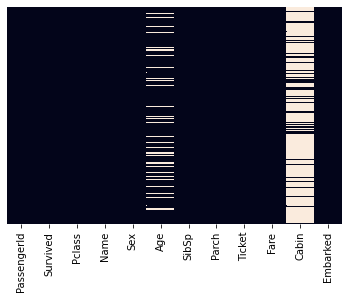

In [6]:
sns.heatmap(df.isna(),cbar=False,annot=False, yticklabels=False)

In [7]:
df.corr()["Survived"].sort_values() 

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

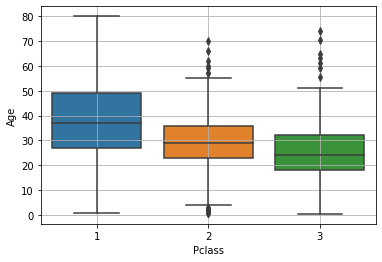

In [8]:
sns.boxplot(x="Pclass",y="Age",data=df)
plt.grid()

In [9]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if (pd.isnull(Age)):
        if (Pclass==1):
            return 37
        elif (Pclass==2):
            return 29
        else:
            return 24
        
    else:
        return Age

In [10]:
df["Age"]=df[["Age","Pclass"]].apply(impute_age,axis=1)

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df.drop('Cabin', axis=1, inplace=True)

In [13]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

In [17]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,24.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


**VISUALIZATION**

**COUNT OF SURVIVED PEOPLE**

Text(0, 0.5, 'Counts')

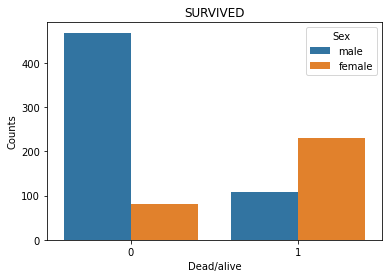

In [18]:
sns.countplot(x="Survived",hue="Sex",data=df)

plt.title("SURVIVED")
plt.xlabel("Dead/alive")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

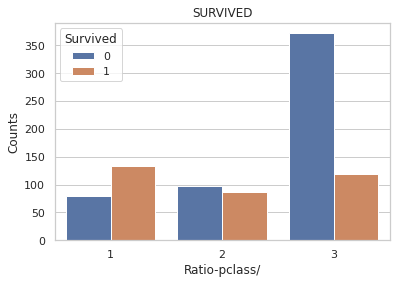

In [19]:
sns.set_theme(style="whitegrid")
sns.countplot(x="Pclass",hue="Survived",data=df)

plt.title("SURVIVED")
plt.xlabel("Ratio-pclass/")
plt.ylabel("Counts")

In [20]:
df.Fare.describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

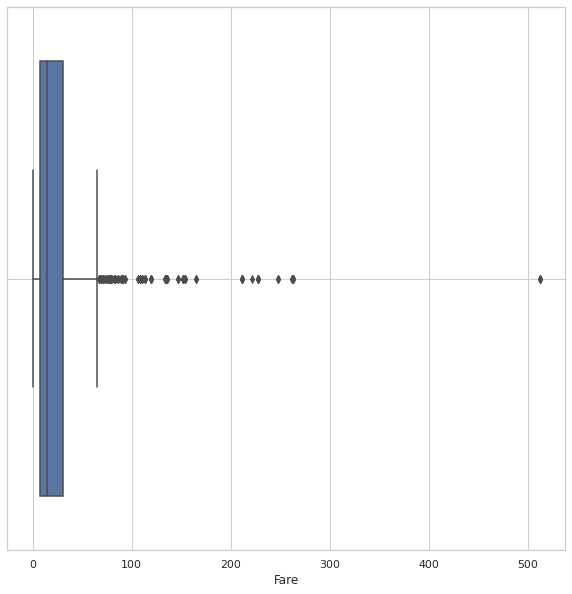

In [21]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Fare",data=df)
plt.grid(True)

Text(0, 0.5, 'NO OF PEOPLE')

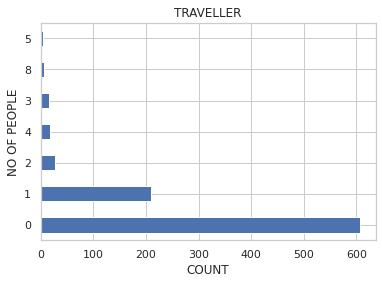

In [22]:
df.SibSp.value_counts().plot(kind="barh")
plt.title("TRAVELLER")
plt.xlabel("COUNT")
plt.ylabel("NO OF PEOPLE")

In [23]:
df.SibSp.value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

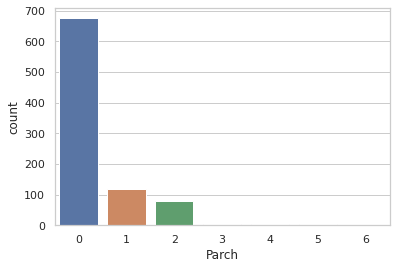

In [24]:
sns.countplot(x="Parch",data=df)

In [25]:
df.Parch.value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

**MODEL BUILDING**

In [26]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [27]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,24.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [28]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

**ENCODING**

In [29]:
from sklearn.compose import ColumnTransformer     
from sklearn.preprocessing import OneHotEncoder

In [30]:
ct=ColumnTransformer(transformers=[("encoder",OneHotEncoder(),["Sex","Embarked"])],remainder="passthrough")
x=np.array(ct.fit_transform(x))

In [31]:
x

array([[ 0.    ,  1.    ,  0.    , ...,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    ,  1.    , ...,  1.    ,  0.    , 71.2833],
       [ 1.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 1.    ,  0.    ,  0.    , ...,  1.    ,  2.    , 23.45  ],
       [ 0.    ,  1.    ,  1.    , ...,  0.    ,  0.    , 30.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  7.75  ]])

In [32]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [35]:
def my_models(model):   #creating function
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    
    print(f"{accuracy_score(ytest,ypred)}\n\n{classification_report(ytest,ypred)}\n\n{confusion_matrix(ytest,ypred)}")

In [36]:
model=[]
model.append(("knn-------",KNeighborsClassifier()))
model.append(("logistic-------",LogisticRegression()))
model.append(("support vector-------",SVC()))


for name,model in model:
    print(name)
    my_models(model)

knn-------
0.7219730941704036

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       138
           1       0.65      0.59      0.62        85

    accuracy                           0.72       223
   macro avg       0.70      0.70      0.70       223
weighted avg       0.72      0.72      0.72       223


[[111  27]
 [ 35  50]]
logistic-------
0.8430493273542601

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       138
           1       0.79      0.80      0.80        85

    accuracy                           0.84       223
   macro avg       0.83      0.83      0.83       223
weighted avg       0.84      0.84      0.84       223


[[120  18]
 [ 17  68]]
support vector-------
0.6502242152466368

              precision    recall  f1-score   support

           0       0.68      0.82      0.74       138
           1       0.56      0.38      0.45        85

    accuracy             

**Hyper Parameter Tunning**

In [37]:
accuracy=[]
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    accuracy.append(ac)

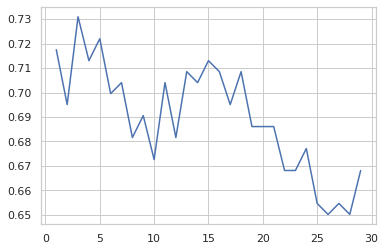

In [38]:
plt.plot(range(1,30),accuracy)
plt.grid(True)

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
para={"C":[0.1,1,10,100,1000],"gamma":[1,0.1,0.01,0.001,0.0001],"kernel":['rbf']}

grid=GridSearchCV(SVC(),para,refit=True,verbose=3)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.619 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.617 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.617 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.617 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.624 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.619 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.617 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.617 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.617 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.617 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.649 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [41]:
grid.best_params_   #using this parameter for tuning in svm

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [42]:
model=[]
model.append(("knn-------",KNeighborsClassifier(n_neighbors=3)))
model.append(("logistic-------",LogisticRegression(solver='newton-cg')))
model.append(("support vector-------",SVC(C=100, gamma=0.001,kernel='rbf')))


for name,model in model:
    print(name)
    my_models(model)

knn-------
0.7309417040358744

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       138
           1       0.65      0.65      0.65        85

    accuracy                           0.73       223
   macro avg       0.71      0.71      0.71       223
weighted avg       0.73      0.73      0.73       223


[[108  30]
 [ 30  55]]
logistic-------
0.852017937219731

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       138
           1       0.80      0.81      0.81        85

    accuracy                           0.85       223
   macro avg       0.84      0.84      0.84       223
weighted avg       0.85      0.85      0.85       223


[[121  17]
 [ 16  69]]
support vector-------
0.8295964125560538

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       138
           1       0.76      0.80      0.78        85

    accuracy              

**Before all the Tuning for LOGISTIC , KNN, SVM**

ACCURACY[KNN]==0.7219730941704036

ACCURACY[LOGISTIC]==0.8430493273542601

ACCURACY[SVM]==0.6502242152466368


**After all the Tuning for LOGISTIC , KNN, SVM**

ACCURACY[KNN]==0.726457399103139

ACCURACY[LOGISTIC]==0.852017937219731

ACCURACY[SVM]=0.8295964125560538